# Support Vector Machine

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cvxopt import matrix,solvers

### Read csv files containing extracted features from flower images

In [2]:
roses = pd.read_csv('rose_features.csv')
chrysanthemums = pd.read_csv('chrysanthemum_features.csv')
butterfly_pea = pd.read_csv('butterflypea_features.csv')

## Main Support Vector Machine Algorithm

In [3]:
def SVM(class1,class2,index):
    line = class1.append(class2,ignore_index=True).drop(columns='Unnamed: 0')
    
    features = np.zeros((len(line),2))
    features[:,0] = line['g']
    features[:,1] = line['eccentricity']
    
    z = np.zeros((len(line),1))
    z[:len(class1)] = 1.0
    z[len(class1):] = -1.0
    
    H = matrix((features@features.T)*(z@z.T))
    f = matrix(-np.ones(len(line)))
    
    A = matrix(-np.identity(len(line)))
    a = matrix(np.zeros(len(line)))
    
    b = matrix(0.0)
    B = matrix(z,(1,len(line)))
    
    sol = solvers.qp(H,f,A,a,B,b)
    
    alpha = np.round(np.array(sol['x']).flatten())
    alpha_index = np.where(alpha>0)[0]
    
    w = ((alpha*z.T)@features)[0]
    w0 = (1/z[np.int(alpha_index[index])]) - (w.T@features[np.int(alpha_index[index])])
    
    A = w[0]
    B = w[1]
    C = -w0

    m = -A/B
    b = C/B
    
    return m,b

### Calculate decision line between butterfly peas and chrysanthemums

In [4]:
index = 0
m2,b2 = SVM(chrysanthemums,butterfly_pea,index)

     pcost       dcost       gap    pres   dres
 0: -2.1883e+01 -5.7798e+01  1e+02  8e+00  2e+00
 1: -4.9353e+01 -8.0190e+01  5e+01  3e+00  9e-01
 2: -9.8205e+01 -1.3292e+02  5e+01  3e+00  8e-01
 3: -1.7517e+02 -2.1711e+02  6e+01  3e+00  7e-01
 4: -2.8170e+02 -3.3709e+02  8e+01  2e+00  4e-01
 5: -3.0951e+02 -3.2772e+02  2e+01  3e-01  8e-02
 6: -3.1068e+02 -3.1106e+02  5e-01  6e-03  2e-03
 7: -3.1076e+02 -3.1076e+02  5e-03  6e-05  2e-05
 8: -3.1076e+02 -3.1076e+02  5e-05  6e-07  2e-07
 9: -3.1076e+02 -3.1076e+02  5e-07  6e-09  2e-09
Optimal solution found.


## Plot of decision lines with scatterplot of flower datapoints

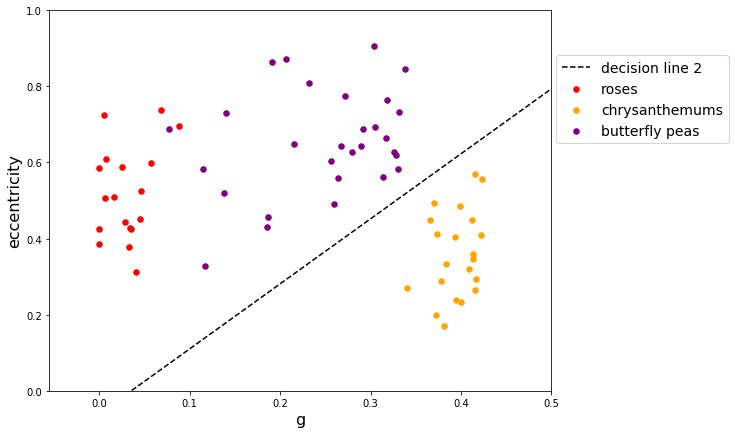

In [5]:
plt.figure(figsize=(9,7))

plt.scatter(roses['g'],roses['eccentricity'],c='red',s=30,label='roses')
plt.scatter(chrysanthemums['g'],chrysanthemums['eccentricity'],c='orange',s=30,label='chrysanthemums')
plt.scatter(butterfly_pea['g'],butterfly_pea['eccentricity'],c='purple',s=30,label='butterfly peas')
# plt.plot(np.linspace(0,1),m1*np.linspace(0,1)+b1,'b--',label = 'decision line 1')
plt.plot(np.linspace(0,1),m2*np.linspace(0,1)+b2,'k--',label = 'decision line 2')
plt.ylabel('eccentricity',fontsize=16)
plt.xlabel('g',fontsize=16)
plt.legend(loc=(1.01,0.65),fontsize=14)
plt.xlim(right=0.5)
plt.ylim(0,1)
# plt.savefig('evsg_svm.png',dpi=300,bbox_inches='tight')
plt.show()